In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
df = pd.read_csv('data/merged_climate_iom_data.csv')

In [3]:
df

,year,month,country_name,country_code,internally_displaced_persons,ag.lnd.frst.k2,ag.lnd.prcp.mm,ag.lnd.totl.k2,ag.srf.totl.k2,eg.cft.accs.ru.zs,...,er.h2o.intr.k3,sp.pop.totl,start_year,start_month,end_year,end_month,disaster_type,cpi,total_affected,climate_catastrophe
0,2010,6,Sudan,SDN,30933,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2010,11,Haiti,HTI,2137764,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2010.0,10.0,2011.0,12.0,Epidemic,71.563596,513997.0,1
2,2010,11,Haiti,HTI,2137764,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2010.0,11.0,2010.0,11.0,Storm,71.563596,5020.0,1
3,2011,1,Haiti,HTI,1612754,3752.74,1440.0,27560.0,27750.0,1.0,...,13.007,9914904.0,2010.0,10.0,2011.0,12.0,Epidemic,71.563596,513997.0,1
4,2011,2,Sudan,SDN,98298,NaN,NaN,NaN,2505810.0,25.9,...,NaN,36140806.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,2025,1,Lebanon,LBN,1333317,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1140,2025,1,Sudan,SDN,69461010,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2024.0,8.0,2025.0,3.0,Epidemic,NaN,57447.0,1
1141,2025,2,Lebanon,LBN,1236267,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1142,2025,2,Syrian Arab Republic,SYR,20983938,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
# Sorting by country and time to ensure proper filling
df.sort_values(by=["country_code", "year", "month"], inplace=True)

columns_to_fill_extended = [
    "AG.LND.FRST.K2", "AG.LND.PRCP.MM", "AG.LND.TOTL.K2", "AG.SRF.TOTL.K2",
    "EG.CFT.ACCS.RU.ZS", "EG.CFT.ACCS.UR.ZS", "EG.CFT.ACCS.ZS", "EG.EGY.PRIM.PP.KD", "EG.ELC.ACCS.ZS", "EG.FEC.RNEW.ZS",
    "EN.GHG.ALL.MT.CE.AR5", "EN.GHG.CH4.AG.MT.CE.AR5", "EN.GHG.CH4.BU.MT.CE.AR5", "EN.GHG.CH4.FE.MT.CE.AR5",
    "EN.GHG.CH4.IC.MT.CE.AR5", "EN.GHG.CH4.MT.CE.AR5", "EN.GHG.CH4.PI.MT.CE.AR5", "EN.GHG.CH4.TR.MT.CE.AR5",
    "EN.GHG.CH4.WA.MT.CE.AR5", "EN.GHG.CO2.BU.MT.CE.AR5", "EN.GHG.CO2.IC.MT.CE.AR5", "EN.GHG.CO2.IP.MT.CE.AR5",
    "EN.GHG.CO2.LU.MT.CE.AR5", "EN.GHG.CO2.MT.CE.AR5", "EN.GHG.CO2.PI.MT.CE.AR5", "EN.GHG.CO2.TR.MT.CE.AR5",
    "EN.GHG.FGAS.IP.MT.CE.AR5", "EN.GHG.N2O.AG.MT.CE.AR5", "EN.GHG.N2O.BU.MT.CE.AR5", "EN.GHG.N2O.FE.MT.CE.AR5",
    "EN.GHG.N2O.IC.MT.CE.AR5", "EN.GHG.N2O.IP.MT.CE.AR5", "EN.GHG.N2O.MT.CE.AR5", "EN.GHG.N2O.PI.MT.CE.AR5",
    "EN.GHG.N2O.TR.MT.CE.AR5", "EN.GHG.N2O.WA.MT.CE.AR5", "ER.FSH.AQUA.MT", "ER.FSH.CAPT.MT", "ER.FSH.PROD.MT",
    "ER.H2O.FWTL.K3", "ER.H2O.INTR.K3", "SP.POP.TOTL"
]

columns_to_fill_extended = [col.lower() for col in columns_to_fill_extended]

# Filtering columns that exist in the dataset
existing_columns = [col for col in columns_to_fill_extended if col in df.columns]

df[existing_columns] = df.groupby("country_code")[existing_columns].transform(lambda x: x.ffill().bfill())

In [5]:
df['total_idp_over_pop'] = (df['internally_displaced_persons'] / df['sp.pop.totl'])*100
df['total_affected_over_pop'] = (df['total_affected'] / df['sp.pop.totl'])*100


In [6]:
weird_values = df[df['total_idp_over_pop'] > 100]

In [7]:
len(weird_values)

23

In [8]:
weird_values[['year','country_name', 'sp.pop.totl','internally_displaced_persons',  'total_idp_over_pop', 'total_affected_over_pop']]

,year,country_name,sp.pop.totl,internally_displaced_persons,total_idp_over_pop,total_affected_over_pop
1123,2024,Lebanon,5773493.0,21095955,365.393272,NaN
1127,2024,Lebanon,5773493.0,18569637,321.636088,NaN
1027,2023,Sudan,50042791.0,63571047,127.033376,NaN
1035,2023,Sudan,50042791.0,63441327,126.774158,NaN
1043,2023,Sudan,50042791.0,55837788,111.580084,NaN
1049,2023,Sudan,50042791.0,76711659,153.292128,NaN
1060,2023,Sudan,50042791.0,95451576,190.739913,NaN
1068,2024,Sudan,50042791.0,72761718,145.399001,NaN
1075,2024,Sudan,50042791.0,94069125,187.977375,NaN
1081,2024,Sudan,50042791.0,78443607,156.753062,NaN


In [9]:
df = df[df['total_idp_over_pop'] < 100]

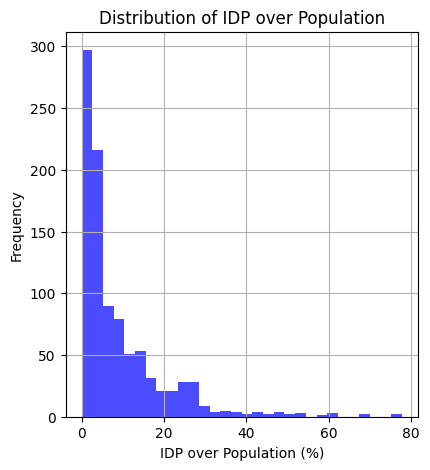

In [10]:
# plot distribution of those two variables

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['total_idp_over_pop'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Distribution of IDP over Population')
plt.xlabel('IDP over Population (%)')
plt.ylabel('Frequency')

plt.grid()



In [39]:
pd.options.display.float_format = '{:.2f}'.format
df[['total_idp_over_pop', 'internally_displaced_persons']].describe()


,total_idp_over_pop,internally_displaced_persons
count,962.00,962.00
mean,8.98,2939246.39
std,10.97,4059056.50
min,0.00,166.00
25%,1.79,326019.00
50%,4.75,1027072.50
75%,12.16,4415163.00
max,77.73,38898405.00


In [11]:
grouped_df = df.groupby(['country_code', 'year'])[['total_idp_over_pop', 'total_affected_over_pop']].mean().reset_index()

In [12]:
grouped_df

,country_code,year,total_idp_over_pop,total_affected_over_pop
0,AFG,2017,8.180970,NaN
1,AFG,2018,19.812373,36.741653
2,AFG,2019,33.637736,35.661340
3,AFG,2020,37.233204,NaN
4,AFG,2021,39.414693,27.499717
...,...,...,...,...
195,ZWE,2018,0.046753,15.333435
196,ZWE,2019,0.985865,45.182593
197,ZWE,2020,0.528264,NaN
198,ZWE,2021,0.782198,NaN


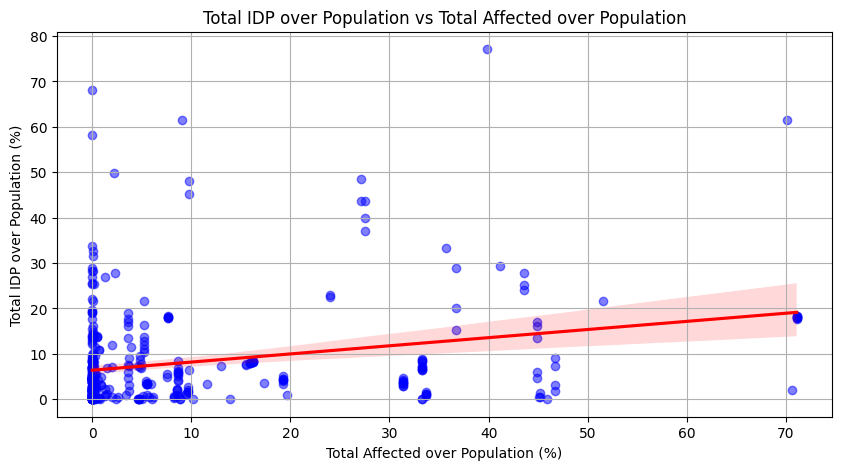

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Scatter plot with regression line
sns.regplot(
    data=df, 
    x="total_affected_over_pop", 
    y="total_idp_over_pop", 
    scatter_kws={"alpha": 0.5, "color": "blue"}, 
    line_kws={"color": "red"}
)

plt.title("Total IDP over Population vs Total Affected over Population")
plt.ylabel("Total IDP over Population (%)")
plt.xlabel("Total Affected over Population (%)")
plt.grid()
plt.show()



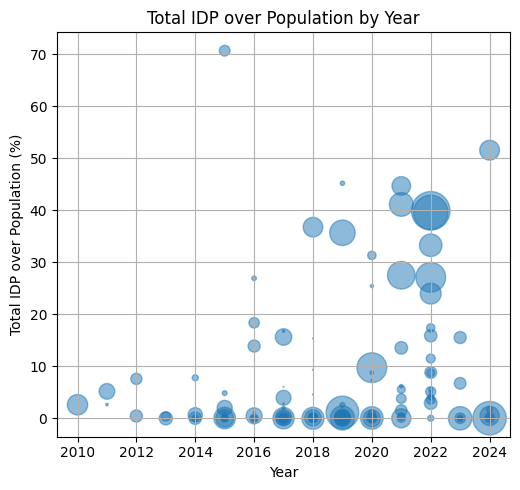

In [14]:
# plot year on x axis, total affected on y axis and give size by total idp over pop
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.scatter(grouped_df['year'], grouped_df['total_affected_over_pop'], s=grouped_df['total_idp_over_pop']*10, alpha=0.5)
plt.title('Total IDP over Population by Year')
plt.xlabel('Year')
plt.ylabel('Total IDP over Population (%)')
plt.grid()
plt.tight_layout()
plt.show()


In [15]:
df

,year,month,country_name,country_code,internally_displaced_persons,ag.lnd.frst.k2,ag.lnd.prcp.mm,ag.lnd.totl.k2,ag.srf.totl.k2,eg.cft.accs.ru.zs,...,start_year,start_month,end_year,end_month,disaster_type,cpi,total_affected,climate_catastrophe,total_idp_over_pop,total_affected_over_pop
343,2017,3,Afghanistan,AFG,739086,12084.4,327.0,652230.0,652860.0,13.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.070911,NaN
383,2017,6,Afghanistan,AFG,2835546,12084.4,327.0,652230.0,652860.0,13.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7.945168,NaN
462,2017,12,Afghanistan,AFG,5184471,12084.4,327.0,652230.0,652860.0,13.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14.526830,NaN
493,2018,3,Afghanistan,AFG,5531499,12084.4,327.0,652230.0,652860.0,14.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,15.054550,NaN
524,2018,6,Afghanistan,AFG,5600775,12084.4,327.0,652230.0,652860.0,14.5,...,2018.0,4.0,2019.0,7.0,Drought,82.410668,13500000.0,1,15.243091,36.741653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2020,7,Zimbabwe,ZWE,105498,174445.8,657.0,386850.0,390760.0,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.679454,NaN
798,2020,11,Zimbabwe,ZWE,58548,174445.8,657.0,386850.0,390760.0,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.377075,NaN
825,2021,3,Zimbabwe,ZWE,122526,173985.1,657.0,386850.0,390760.0,7.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.775618,NaN
841,2021,5,Zimbabwe,ZWE,124605,173985.1,657.0,386850.0,390760.0,7.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.788779,NaN


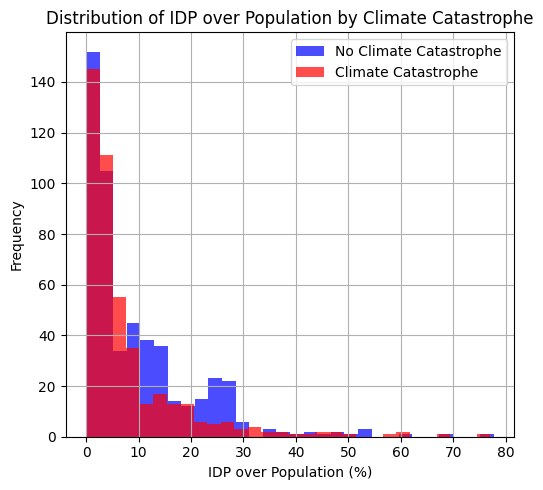

In [16]:
# Plot density plot that shows number of displaced people for when there is a climate catastrophe 0 and 1
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df[df['climate_catastrophe'] == 0]['total_idp_over_pop'].dropna(), bins=30, color='blue', alpha=0.7, label='No Climate Catastrophe')
plt.hist(df[df['climate_catastrophe'] == 1]['total_idp_over_pop'].dropna(), bins=30, color='red', alpha=0.7, label='Climate Catastrophe')
plt.title('Distribution of IDP over Population by Climate Catastrophe')
plt.xlabel('IDP over Population (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [17]:
df.columns

Index(['year', 'month', 'country_name', 'country_code',
       'internally_displaced_persons', 'ag.lnd.frst.k2', 'ag.lnd.prcp.mm',
       'ag.lnd.totl.k2', 'ag.srf.totl.k2', 'eg.cft.accs.ru.zs',
       'eg.cft.accs.ur.zs', 'eg.cft.accs.zs', 'eg.egy.prim.pp.kd',
       'eg.elc.accs.zs', 'eg.fec.rnew.zs', 'en.ghg.all.mt.ce.ar5',
       'en.ghg.ch4.ag.mt.ce.ar5', 'en.ghg.ch4.bu.mt.ce.ar5',
       'en.ghg.ch4.fe.mt.ce.ar5', 'en.ghg.ch4.ic.mt.ce.ar5',
       'en.ghg.ch4.mt.ce.ar5', 'en.ghg.ch4.pi.mt.ce.ar5',
       'en.ghg.ch4.tr.mt.ce.ar5', 'en.ghg.ch4.wa.mt.ce.ar5',
       'en.ghg.co2.bu.mt.ce.ar5', 'en.ghg.co2.ic.mt.ce.ar5',
       'en.ghg.co2.ip.mt.ce.ar5', 'en.ghg.co2.lu.mt.ce.ar5',
       'en.ghg.co2.mt.ce.ar5', 'en.ghg.co2.pi.mt.ce.ar5',
       'en.ghg.co2.tr.mt.ce.ar5', 'en.ghg.fgas.ip.mt.ce.ar5',
       'en.ghg.n2o.ag.mt.ce.ar5', 'en.ghg.n2o.bu.mt.ce.ar5',
       'en.ghg.n2o.fe.mt.ce.ar5', 'en.ghg.n2o.ic.mt.ce.ar5',
       'en.ghg.n2o.ip.mt.ce.ar5', 'en.ghg.n2o.mt.ce.ar5',
       '

In [18]:
env_factors = [
'ag.lnd.frst.k2', 'ag.lnd.prcp.mm',
       'ag.lnd.totl.k2', 'ag.srf.totl.k2', 'eg.cft.accs.ru.zs',
       'eg.cft.accs.ur.zs', 'eg.cft.accs.zs', 'eg.egy.prim.pp.kd',
       'eg.elc.accs.zs', 'eg.fec.rnew.zs', 'en.ghg.all.mt.ce.ar5',
       'en.ghg.ch4.ag.mt.ce.ar5', 'en.ghg.ch4.bu.mt.ce.ar5',
       'en.ghg.ch4.fe.mt.ce.ar5', 'en.ghg.ch4.ic.mt.ce.ar5',
       'en.ghg.ch4.mt.ce.ar5', 'en.ghg.ch4.pi.mt.ce.ar5',
       'en.ghg.ch4.tr.mt.ce.ar5', 'en.ghg.ch4.wa.mt.ce.ar5',
       'en.ghg.co2.bu.mt.ce.ar5', 'en.ghg.co2.ic.mt.ce.ar5',
       'en.ghg.co2.ip.mt.ce.ar5', 'en.ghg.co2.lu.mt.ce.ar5',
       'en.ghg.co2.mt.ce.ar5', 'en.ghg.co2.pi.mt.ce.ar5',
       'en.ghg.co2.tr.mt.ce.ar5', 'en.ghg.fgas.ip.mt.ce.ar5',
       'en.ghg.n2o.ag.mt.ce.ar5', 'en.ghg.n2o.bu.mt.ce.ar5',
       'en.ghg.n2o.fe.mt.ce.ar5', 'en.ghg.n2o.ic.mt.ce.ar5',
       'en.ghg.n2o.ip.mt.ce.ar5', 'en.ghg.n2o.mt.ce.ar5',
       'en.ghg.n2o.pi.mt.ce.ar5', 'en.ghg.n2o.tr.mt.ce.ar5',
       'en.ghg.n2o.wa.mt.ce.ar5', 'er.fsh.aqua.mt', 'er.fsh.capt.mt',
       'er.fsh.prod.mt', 'er.h2o.fwtl.k3', 'er.h2o.intr.k3', 'sp.pop.totl',
       'cpi', 'total_affected']

#impute mean to nas in env_factors

for col in env_factors:
       if col == 'total_affected':
              df[col].fillna(0, inplace=True)
       else:
              df[col].fillna(df[col].mean(), inplace=True)


import statsmodels.api as sm

# Drop rows with missing values in the selected columns
df_clean = df[["internally_displaced_persons"] + env_factors].dropna()

# Define independent (X) and dependent (y) variables
X = df_clean[env_factors]  # Environmental factors
y = df_clean["internally_displaced_persons"]  # Displacement

# Add a constant term for the regression model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display model summary
model.summary()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24952\2405321365.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24952\2405321365.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\LENOVO\AppData\L

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     internally_displaced_persons   R-squared:                       0.623
Model:                                      OLS   Adj. R-squared:                  0.605
Method:                           Least Squares   F-statistic:                     34.50
Date:                          Thu, 03 Apr 2025   Prob (F-statistic):          4.45e-163
Time:                                  22:43:14   Log-Likelihood:                -15533.
No. Observations:                           962   AIC:                         3.116e+04
Df Residuals:                               917   BIC:                         3.138e+04
Df Model:                                    44                                         
Covariance Type:                      nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.857e+06   2.15e+06      0.864      0.388   -2.36e+06    6.07e+06
ag.lnd.frst.k2               3.0537      2.823      1.082      0.280      -2.487       8.594
ag.lnd.prcp.mm            -648.3568    594.658     -1.090      0.276   -1815.406     518.693
ag.lnd.totl.k2               6.6847      2.235      2.991      0.003       2.298      11.071
ag.srf.totl.k2              -5.9569      2.070     -2.878      0.004     -10.020      -1.894
eg.cft.accs.ru.zs         2.251e+05    3.8e+04      5.927      0.000    1.51e+05       3e+05
eg.cft.accs.ur.zs         1.048e+05    2.1e+04      4.996      0.000    6.36e+04    1.46e+05
eg.cft.accs.zs           -2.703e+05   5.54e+04     -4.876      0.000   -3.79e+05   -1.61e+05
eg.egy.prim.pp.kd        -3.035e+05   8.25e+04     -3.678      0.000   -4.66e+05   -1.42e+05
eg.elc.accs.zs            9125.7772   1.12e+04      0.815      0.415   -1.29e+04    3.11e+04
eg.fec.rnew.zs           -1888.6693   1.05e+04     -0.180      0.857   -2.25e+04    1.87e+04
en.ghg.all.mt.ce.ar5     -1385.4172    949.592     -1.459      0.145   -3249.043     478.209
en.ghg.ch4.ag.mt.ce.ar5  -3623.7834   1258.931     -2.878      0.004   -6094.505   -1153.062
en.ghg.ch4.bu.mt.ce.ar5  -1210.6565    620.557     -1.951      0.051   -2428.533       7.220
en.ghg.ch4.fe.mt.ce.ar5   4561.6524    992.629      4.596      0.000    2613.565    6509.740
en.ghg.ch4.ic.mt.ce.ar5  -1.194e+04   2100.539     -5.684      0.000   -1.61e+04   -7817.914
en.ghg.ch4.mt.ce.ar5      1058.4316   1109.042      0.954      0.340   -1118.124    3234.987
en.ghg.ch4.pi.mt.ce.ar5   2810.2160   1340.142      2.097      0.036     180.115    5440.317
en.ghg.ch4.tr.mt.ce.ar5   3816.9192    647.147      5.898      0.000    2546.859    5086.980
en.ghg.ch4.wa.mt.ce.ar5  -2914.1435    864.291     -3.372      0.001   -4610.362   -1217.925
en.ghg.co2.bu.mt.ce.ar5   -764.1513   1001.807     -0.763      0.446   -2730.253    1201.950
en.ghg.co2.ic.mt.ce.ar5   -901.5749    658.563     -1.369      0.171   -2194.041     390.891
en.ghg.co2.ip.mt.ce.ar5   1518.8581    653.164      2.325      0.020     236.987    2800.729
en.ghg.co2.lu.mt.ce.ar5   1805.7874    883.505      2.044      0.041      71.861    3539.714
en.ghg.co2.mt.ce.ar5     -5319.4308   1313.129     -4.051      0.000   -7896.518   -2742.344
en.ghg.co2.pi.mt.ce.ar5   -453.0936    627.456     -0.722      0.470   -1684.509     778.322
en.ghg.co2.tr.mt.ce.ar5  -2305.6919   1377.796     -1.673      0.095   -5009.691     398.308
en.ghg.fgas.ip.mt.ce.ar5 -1599.7063    829.260     -1.929      0.054   -3227.174      27.761
en.ghg.n2o.ag.mt.ce.ar5   6318.4748   2379.208      2.656      0.008    1649.149     1.1e+

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model on the training set
model_train = sm.OLS(y_train, X_train).fit()

# Predict on the test set
y_pred = model_train.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(1554611.4319421155, 0.6596509991961468)

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df.drop(columns=["internally_displaced_persons"]), drop_first=True)

# Fill missing values with the median
df_encoded = df_encoded.fillna(df_encoded.median(numeric_only=True))
y_filled = df["internally_displaced_persons"].fillna(df["internally_displaced_persons"].median())

# Split into train and test sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(df_encoded, y_filled, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluate model performance
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

mae_rf, r2_rf


(87824.00860103627, 0.997590950349355)

In [23]:
from sklearn.linear_model import Ridge, Lasso

# Initialize Ridge and Lasso models
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength
lasso_model = Lasso(alpha=0.1)  # Alpha for Lasso

# Train Ridge Regression
ridge_model.fit(X_train_rf, y_train_rf)
y_pred_ridge = ridge_model.predict(X_test_rf)
mae_ridge = mean_absolute_error(y_test_rf, y_pred_ridge)
r2_ridge = r2_score(y_test_rf, y_pred_ridge)

# Train Lasso Regression
lasso_model.fit(X_train_rf, y_train_rf)
y_pred_lasso = lasso_model.predict(X_test_rf)
mae_lasso = mean_absolute_error(y_test_rf, y_pred_lasso)
r2_lasso = r2_score(y_test_rf, y_pred_lasso)

# Output results
(mae_ridge, r2_ridge), (mae_lasso, r2_lasso)


c:\Users\LENOVO\anaconda3\envs\hertie_climate_migration\lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.28226e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\LENOVO\anaconda3\envs\hertie_climate_migration\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.339e+14, tolerance: 1.282e+12
  model = cd_fast.enet_coordinate_descent(


((821144.5480906297, 0.8999417595114169),
 (895220.2943734545, 0.7833936852467105))